In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
# import matplotlib
from tqdm import tqdm
import torch


# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
sns.set_style("darkgrid")

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

C:\Users\vankh\AppData\Local\Temp/ipykernel_17940/3268593948.py:10: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
separable = False
while not separable:
    samples = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])


red_labels = np.zeros(len(red))
blue_labels = np.ones(len(blue))

labels = np.append(red_labels,blue_labels)
inputs = np.concatenate((red,blue),axis=0)

In [3]:
X_train, X_test, y_train,  y_test = train_test_split(
    inputs, labels, test_size=0.33, random_state=42)

In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [5]:
epochs = 20000
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.01

model = LogisticRegression(input_dim,output_dim)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")




Training Epochs:  53%|█████▎    | 10638/20000 [00:02<00:02, 4608.75it/s]

Iteration: 10000. 
Test - Loss: 0.028072539716959. Accuracy: 100.0
Train -  Loss: 0.03787308186292648. Accuracy: 98.95522388059702



Training Epochs: 100%|██████████| 20000/20000 [00:04<00:00, 4599.10it/s]

Iteration: 20000. 
Test - Loss: 0.016693174839019775. Accuracy: 100.0
Train -  Loss: 0.025613106787204742. Accuracy: 99.40298507462687



In [6]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    y = y.detach().numpy()
    
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c='r')
    # u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    # plt.plot(u, (0.5-b-w[0]*u)/w[1])
    # plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    # plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    # plt.xlabel(r'$\boldsymbol{x_1}$',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    # plt.ylabel(r'$\boldsymbol{x_2}$',fontsize=16)
    # plt.title(title)
    plt.show()


# Train Data
model_plot(model,X_train,y_train,'Train Data')

# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

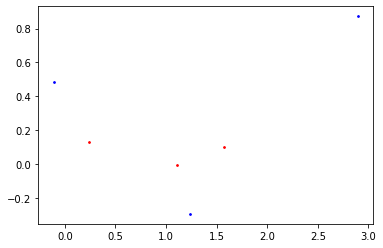

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[2.897534798034255,0.872359037956732,1],
                 [1.234850239781278,-0.293047584301112,1],
                 [0.238575209753427,0.129572680572429,0],
                 [-0.109757648021958,0.484048547480385,1],
                 [1.109735783200013,-0.002785328902198,0],
                 [1.572803975652908,0.098547849368397,0]])

x = data[:, [0, 1]]
y = data[:, -1].astype(int)

plt.scatter(x[:,0][y==0], x[:,1][y==0], s=3, c='r')
plt.scatter(x[:,0][y==1], x[:,1][y==1], s=3, c='b')
plt.show()